In [376]:
import pandas as pd
import numpy as np
import rpy2.robjects as robjects
import scipy
from rpy2.robjects import pandas2ri
pandas2ri.activate()

readRDS = robjects.r['readRDS']

import matplotlib.pyplot as plt

# local quality

In [447]:
prog = ["SDM", "MAESTRO", "mCSM", "CUPSAT", "MuPro", "real.table"]
df = []
for i in range(6):
    df.append(pandas2ri.ri2py(readRDS(f"res.{prog[i]}.rds")))
    df[i] = df[i].set_index("key")
    if i == 1 or i == 3:
        df[i]["PRED_DDG"] = -df[i]["PRED_DDG"]
    df[i] = df[i].add_prefix(f"{prog[i][0:2]}_")

In [448]:
result = pd.concat(df, axis=1, join_axes=[df[0].index])
result.head()

,SD_PDB,SD_Chain.ID,SD_POS,SD_WT,SD_MUT,SD_WT_SSE,SD_WT_RSA...,SD_WT_DEPTH..angstrom.,SD_WT_OSP,SD_WT_SS,...,CU_WT,CU_POS,CU_MUT,CU_PRED_DDG,Mu_PDB,Mu_POS,Mu_WT,Mu_MUT,Mu_PRED_DDG,re_DDG
key,,,,,,,,,,,,,,,,,,,,,
1A0F_S_11_A,1A0F,A,11,S,A,a,0.000000,7.91,0.539,0,...,S,11.0,A,-0.90,1A0F,11,S,A,-0.51785958,-1.8
1A5E_D_74_N,1A5E,A,74,D,N,b,15.600000,4.18,0.435,1,...,D,74.0,N,-4.03,1A5E,74,D,N,-1.4072279,-2.0
1A5E_P_81_L,1A5E,A,81,P,L,H,0.000000,8.53,0.547,0,...,P,81.0,L,3.93,1A5E,81,P,L,-0.35977395,0.0
1A5E_D_84_N,1A5E,A,84,D,N,H,3.200000,5.65,0.547,1,...,D,84.0,N,0.67,1A5E,84,D,N,-0.092715812,-0.1
1A7C_R_30_E,1A7C,A,30,R,E,b,65.099998,3.27,0.285,0,...,R,30.0,E,-0.24,1A7C,30,R,E,-1.1570861,-1.2


In [449]:
ddg = result[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG", "CU_PRED_DDG", "Mu_PRED_DDG", "re_DDG"]].dropna().astype(float)
ddg.head()

,SD_PRED_DDG,MA_PRED_DDG,mC_PRED_DDG,CU_PRED_DDG,Mu_PRED_DDG,re_DDG
key,,,,,,
1A0F_S_11_A,0.60,-0.761365,-0.970,-0.90,-0.517860,-1.8
1A5E_D_74_N,0.19,-1.594357,-0.214,-4.03,-1.407228,-2.0
1A5E_P_81_L,3.38,0.528720,-0.932,3.93,-0.359774,0.0
1A5E_D_84_N,0.47,-1.216384,-1.141,0.67,-0.092716,-0.1
1A7C_R_30_E,-0.24,-0.958248,0.058,-0.24,-1.157086,-1.2


In [450]:
ddg.describe()

,SD_PRED_DDG,MA_PRED_DDG,mC_PRED_DDG,CU_PRED_DDG,Mu_PRED_DDG,re_DDG
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,-0.882562,-1.140850,-1.251491,-1.441054,-1.159607,-1.275960
std,1.399059,1.209585,0.929274,1.680753,0.708660,1.763006
min,-4.770000,-4.947374,-3.886000,-9.450000,-3.826147,-10.800000
25%,-1.747500,-1.869045,-1.935000,-2.297500,-1.578998,-2.317758
50%,-0.500000,-0.957879,-1.134500,-1.330000,-1.107221,-0.932568
75%,0.117500,-0.186543,-0.554250,-0.420000,-0.658255,-0.111667
max,3.380000,1.163373,1.412000,11.040000,0.818485,6.166667


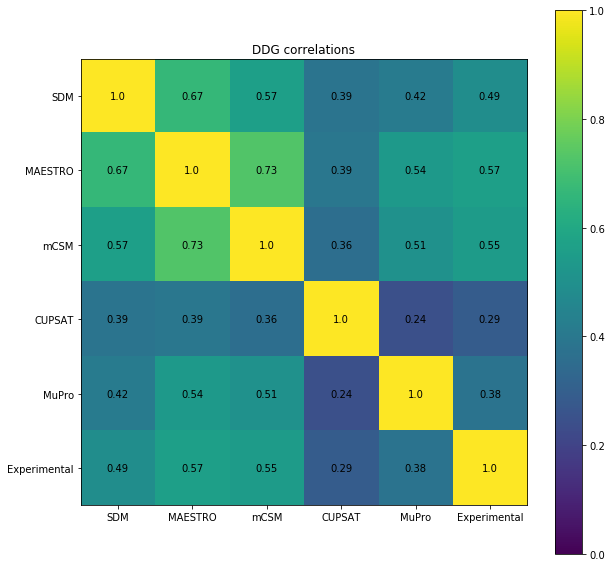

In [451]:
prog_tmp = prog
prog_tmp[5] = 'Experimental'
plt.figure(figsize=(10,10))
corr = np.corrcoef(ddg.T)
plt.title("DDG correlations")
plt.imshow(corr, vmin=0, vmax=1)
plt.xticks(range(len(prog)), prog_tmp)
plt.yticks(range(len(prog)), prog_tmp)
for i in range(len(prog)):
    for j in range(len(prog)):
        plt.text(i, j, np.round(corr[i, j], 2), {"ha":"center", "va":"center"})
plt.colorbar()

In [452]:
corr

array([[1.        , 0.66513585, 0.56624389, 0.38570054, 0.41512892,
        0.48916376],
       [0.66513585, 1.        , 0.72847353, 0.39497721, 0.53632532,
        0.56586335],
       [0.56624389, 0.72847353, 1.        , 0.36189433, 0.50556484,
        0.54706194],
       [0.38570054, 0.39497721, 0.36189433, 1.        , 0.24429501,
        0.28943819],
       [0.41512892, 0.53632532, 0.50556484, 0.24429501, 1.        ,
        0.38263215],
       [0.48916376, 0.56586335, 0.54706194, 0.28943819, 0.38263215,
        1.        ]])

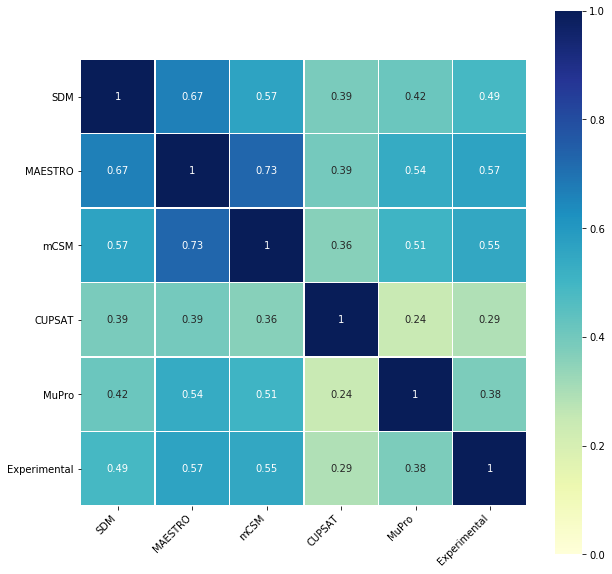

In [467]:
plt.figure(figsize=(10,10))

keeyss = {}
for i in range(0, 5):
    keeyss[prog_tmp[i]] = corr[0, i]

ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1,
    cmap="YlGnBu",
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(prog_tmp)
ax.set_yticklabels(prog_tmp)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

# SDM quality

In [395]:
import seaborn as sns

In [396]:
df = []
df.append(pandas2ri.ri2py(readRDS(f"res.full.SDM.rds")))
df[0] = df[0].set_index("key")
df[0] = df[0].add_prefix(f"S_")
df.append(pandas2ri.ri2py(readRDS(f"res.real.table.rds")))
df[1] = df[1].set_index("key")
df[1] = df[1].add_prefix(f"R_")

In [397]:
result = pd.concat(df, axis=1, join_axes=[df[0].index])
result.head()
#result.shape

,S_PDB,S_Chain.ID,S_POS,S_WT,S_MUT,S_WT_SSE,S_WT_RSA...,S_WT_DEPTH..angstrom.,S_WT_OSP,S_WT_SS,...,S_MT_SSE,S_MT_RSA...,S_MT_DEPTH..angstrom.,S_MT_OSP,S_MT_SS,S_MT_SN,S_MT_SO,S_PRED_DDG,S_Outcome,R_DDG
key,,,,,,,,,,,,,,,,,,,,,
1A43_G_156_A,1A43,A,156,G,A,p,54.799999,4.02,0.418,0,...,p,56.299999,3.20,0.384,0,0,0,0.02,Increased stability,-1.90
1A43_E_159_D,1A43,A,159,E,D,p,25.299999,3.71,0.392,1,...,p,50.200001,3.78,0.242,0,0,0,-0.52,Reduced stability,-3.50
1A43_R_167_A,1A43,A,167,R,A,H,43.599998,3.57,0.312,1,...,H,52.799999,3.56,0.387,0,0,0,-0.09,Reduced stability,-3.05
1A43_W_184_A,1A43,A,184,W,A,H,82.099998,3.40,0.173,0,...,H,77.500000,3.22,0.320,0,0,0,0.47,Increased stability,-0.70
1A43_C_218_S,1A43,A,218,C,S,a,9.200000,4.84,0.438,0,...,t,20.900000,4.32,0.357,1,0,0,-0.93,Reduced stability,-2.55


In [398]:
ddg = result[["S_PRED_DDG", "R_DDG"]]
ddg['AvDiv'] = np.abs(ddg['S_PRED_DDG'] - ddg['R_DDG'])
ddg.head()

/home/al820/miniconda/envs/diplom-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,S_PRED_DDG,R_DDG,AvDiv
key,,,
1A43_G_156_A,0.02,-1.90,1.92
1A43_E_159_D,-0.52,-3.50,2.98
1A43_R_167_A,-0.09,-3.05,2.96
1A43_W_184_A,0.47,-0.70,1.17
1A43_C_218_S,-0.93,-2.55,1.62


In [399]:
print(scipy.stats.pearsonr(result['S_WT_OSP'], ddg['AvDiv']))
print(scipy.stats.pearsonr(result['S_WT_RSA...'], ddg['AvDiv']))
print(scipy.stats.pearsonr(result['S_MT_DEPTH..angstrom.'], ddg['AvDiv']))

(0.23232094507401044, 1.135253212367215e-53)
(-0.2253571253466574, 1.5845738492621945e-50)
(0.2068268079105321, 1.1475324555138714e-42)


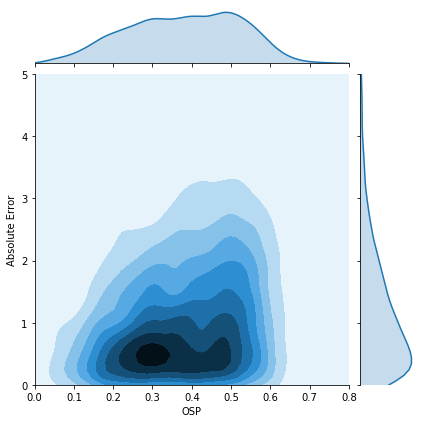

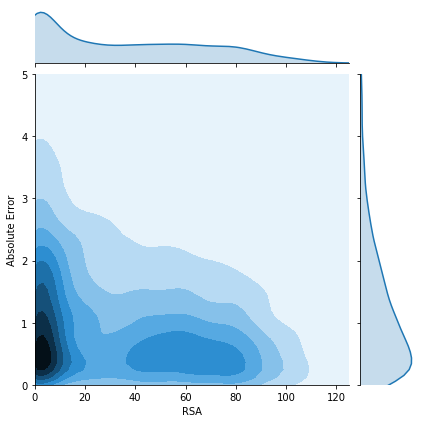

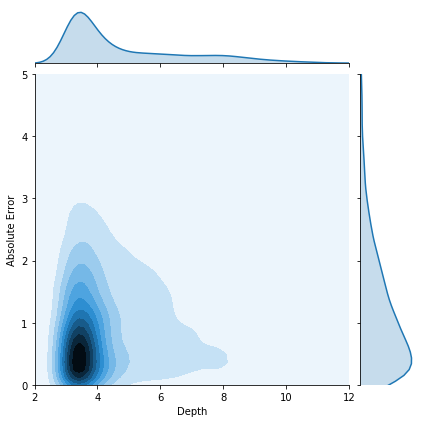

In [412]:
#plt.figure(figsize=(16, 8))
#plt.subplot(131)
ax = sns.jointplot(result['S_WT_OSP'], ddg['AvDiv'], kind='kde', ylim=(0,5), xlim=(0,0.8))
ax.set_axis_labels(*['OSP','Absolute Error'])
plt.show()
#plt.subplot(132)
ax =sns.jointplot(result['S_WT_RSA...'], ddg['AvDiv'], kind='kde',  ylim=(0,5), xlim=(0,125))
ax.set_axis_labels(*['RSA','Absolute Error'])
plt.show()
#plt.subplot(133)
ax =sns.jointplot(result['S_MT_DEPTH..angstrom.'], ddg['AvDiv'], kind='kde',  ylim=(0,5), xlim=(2,12))
ax.set_axis_labels(*['Depth','Absolute Error'])
plt.show()

In [ ]:
plt.title("Depth KDE plot")
sb.kdeplot(result["S_WT_DEPTH..angstrom."])

# Global quality

In [481]:
#prog = ["SDM", "MAESTRO", "mCSM", "CUPSAT"]
prog = ["SDM", "MAESTRO", "mCSM"]
df = []
for i in range(3):
    df.append(pandas2ri.ri2py(readRDS(f"res.ready.{prog[i]}.rds")))
    df[i] = df[i].set_index("key")
    if i == 1: #or i == 3:
        df[i]["PRED_DDG"] = -df[i]["PRED_DDG"]
    df[i] = df[i].add_prefix(f"{prog[i][0]}_")
    

In [482]:
result = pd.concat(df, axis=1, join_axes=[df[0].index])
result.head()

,S_PDB,S_Chain.ID,S_POS,S_WT,S_MUT,S_WT_SSE,S_WT_RSA...,S_WT_DEPTH..angstrom.,S_WT_OSP,S_WT_SS,...,M_chain,M_WT,M_POS,M_MUT,M_PRED_DDG,m_PDB,m_WT,m_POS,m_MUT,m_PRED_DDG
key,,,,,,,,,,,,,,,,,,,,,
1AL0_M_1_A,1AL0,B,1,M,A,b,68.0,3.33,0.12,0,...,B,M,1,A,0.453225,1AL0,M,1.0,A,-0.143
1AL0_M_1_C,1AL0,B,1,M,C,b,68.0,3.33,0.12,0,...,B,M,1,C,0.520635,1AL0,M,1.0,C,-0.328
1AL0_M_1_D,1AL0,B,1,M,D,b,68.0,3.33,0.12,0,...,B,M,1,D,1.035553,1AL0,M,1.0,D,0.276
1AL0_M_1_E,1AL0,B,1,M,E,b,68.0,3.33,0.12,0,...,B,M,1,E,1.273418,1AL0,M,1.0,E,0.230
1AL0_M_1_F,1AL0,B,1,M,F,b,68.0,3.33,0.12,0,...,B,M,1,F,0.744781,1AL0,M,1.0,F,-0.127


In [483]:
ddg = result[["S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"]] #"C_PRED_DDG"]]
ddg.head()

,S_PRED_DDG,M_PRED_DDG,m_PRED_DDG
key,,,
1AL0_M_1_A,0.0,0.453225,-0.143
1AL0_M_1_C,0.0,0.520635,-0.328
1AL0_M_1_D,0.0,1.035553,0.276
1AL0_M_1_E,0.0,1.273418,0.230
1AL0_M_1_F,0.0,0.744781,-0.127


## Strange zeros for SDM

In [484]:
len(ddg["S_PRED_DDG"].unique()), len(ddg["S_PRED_DDG"])

(745, 43318)

In [485]:
np.array(result[ddg["S_PRED_DDG"] == 0]["S_PDB"].drop_duplicates())

array(['1AL0', '1B8X', '1DEV', '1DZF', '1GKU', '1INP', '1IO1', '1IXM',
       '1LML', '1MUK', '1N0U', '1N7D', '1OW1', '1QSA', '1UOY', '1UX6',
       '1W6K', '1X0T', '1ZHX', '2AYD', '2CI8', '2CIU', '2EGT', '2G3R',
       '2HD9', '2ILR', '2LIS', '2NYK', '2O9U', '2OML', '2QKD', '2VDF',
       '2WB0', '2WP7', '2X3M', '2XJP', '2ZJ8', '3A57', '3BG1', '3BXJ',
       '3DKM', '3EH1', '3MTV', '3O4Z', '3P5J', '3PFG', '3PMQ', '3PR9',
       '3RGZ', '3RKG', '3TCQ', '3TTC', '3UH8', '3VEN', '3WNZ', '3ZHE',
       '3ZZO', '4AEQ', '4AK1', '4APM', '4BKW', '4FO0', '4HCW', '4HS2',
       '4IM0', '4K51', '4O65', '4WFO', '4WHI', '5GV0'], dtype=object)

## PCA with explained ratio

In [486]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler as SS

In [487]:
ddg.describe()

,S_PRED_DDG,M_PRED_DDG,m_PRED_DDG
count,43318.000000,43318.000000,43318.000000
mean,-0.549115,-0.467089,-0.888284
std,1.152919,0.937190,0.934734
min,-4.800000,-5.885050,-4.955000
25%,-1.160000,-0.811285,-1.416000
50%,-0.340000,-0.200292,-0.735000
75%,0.200000,0.110153,-0.231000
max,4.690000,2.061828,2.857000


In [488]:
model = PCA()
model = Pipeline([("ss", SS()),
                  ("pca", PCA())])
ans = model.fit_transform(ddg)

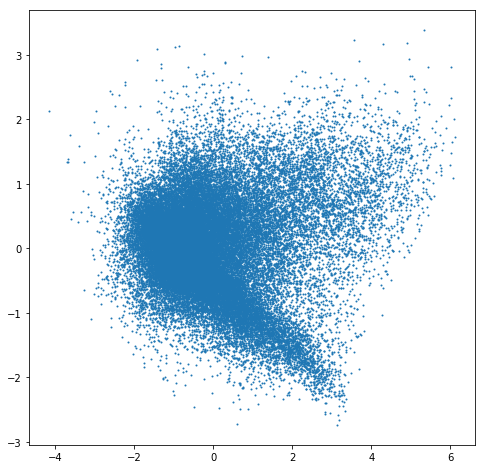

In [489]:
plt.figure(figsize=(8, 8))
plt.scatter(ans[:, 0], ans[:, 1], s=1)

In [490]:
model.steps[1][1].explained_variance_ratio_

array([0.63172349, 0.19317763, 0.17509889])

In [491]:
model.steps["svm"].explained_variance_ratio_, np.cumsum(model.explained_variance_ratio_)

TypeError: list indices must be integers or slices, not str

## TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model = TSNE()
model = Pipeline([("ss", SS()),
                  ("t-SNE", TSNE())])
ans = model.fit_transform(ddg)

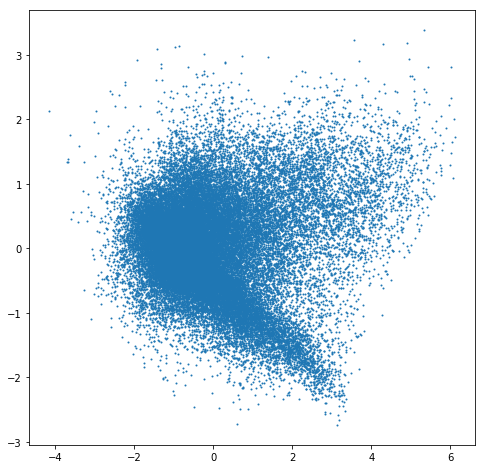

In [492]:
plt.figure(figsize=(8, 8))
plt.scatter(ans[:, 0], ans[:, 1], s=1)

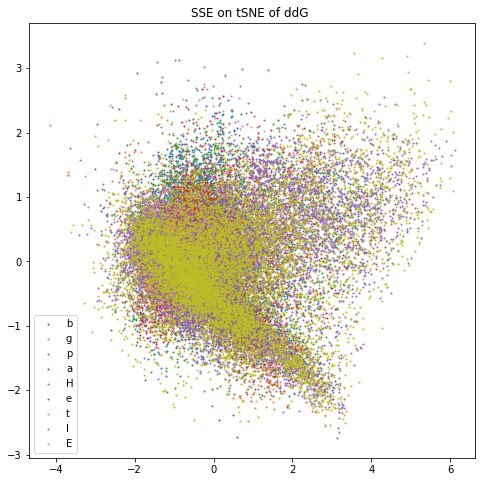

In [493]:
plt.figure(figsize=(8, 8))
plt.title("SSE on tSNE of ddG ")
for i in result.S_WT_SSE.unique():
    tmp = ans[result["S_WT_SSE"] == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()

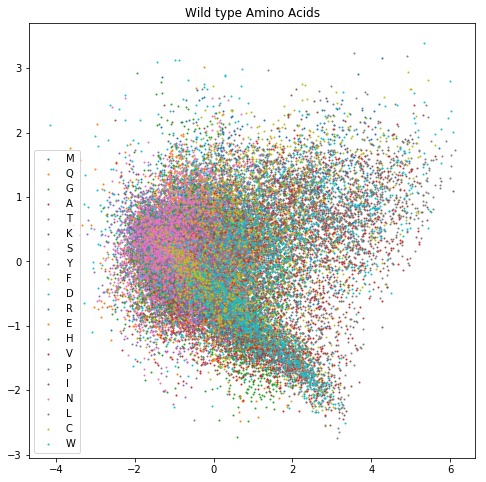

In [494]:
plt.figure(figsize=(8, 8))
plt.title("Wild type Amino Acids")
for i in result.S_WT.unique():
    tmp = ans[result["S_WT"] == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()

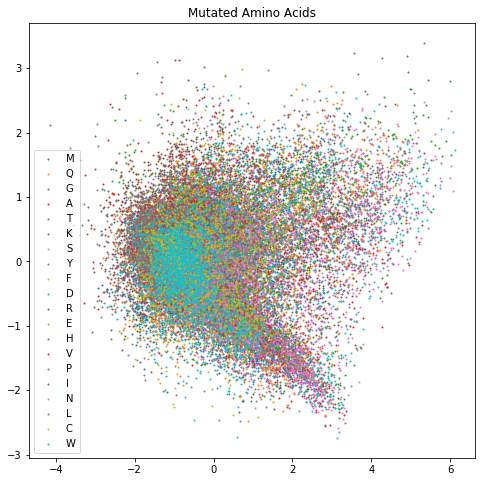

In [495]:
plt.figure(figsize=(8, 8))
plt.title("Mutated Amino Acids")
for i in result.S_WT.unique():
    tmp = ans[result["S_MUT"] == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()

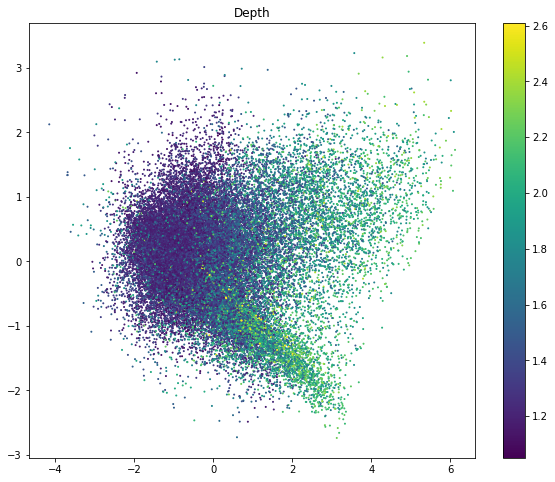

In [496]:
plt.figure(figsize=(10, 8))
plt.title("Depth")
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=np.log(result["S_WT_DEPTH..angstrom."]))
plt.colorbar()

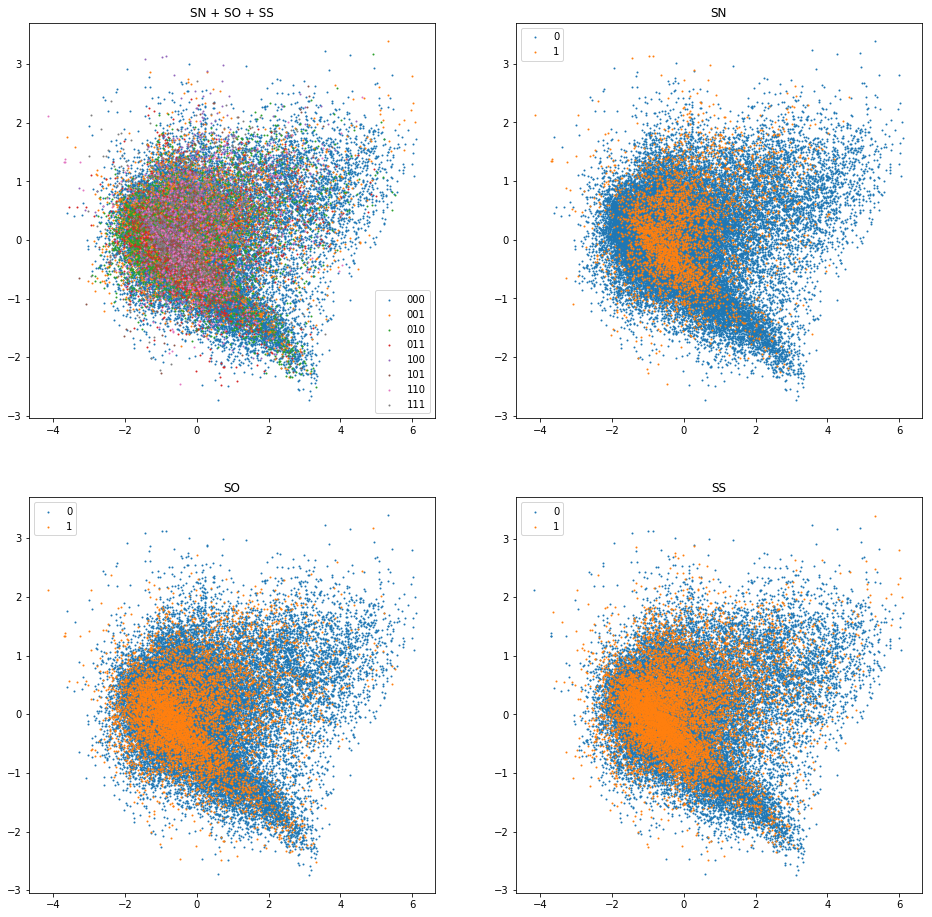

In [497]:

plt.figure(figsize=(16, 16))

plt.subplot(221)
plt.title("SN + SO + SS")

t = result["S_WT_SN"].astype(str) + result["S_WT_SO"].astype(str) + result["S_WT_SS"].astype(str)
for i in sorted(t.unique()):
    tmp = ans[t == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()


for num, i in enumerate(["SN", "SO", "SS"]):
    plt.subplot(222 + num)
    plt.title(i)
    t = result[f"S_WT_{i}"]
    for j in [0, 1]:
        plt.scatter(ans[t == j, 0], ans[t == j, 1], s=1, label=str(j))
    plt.legend()

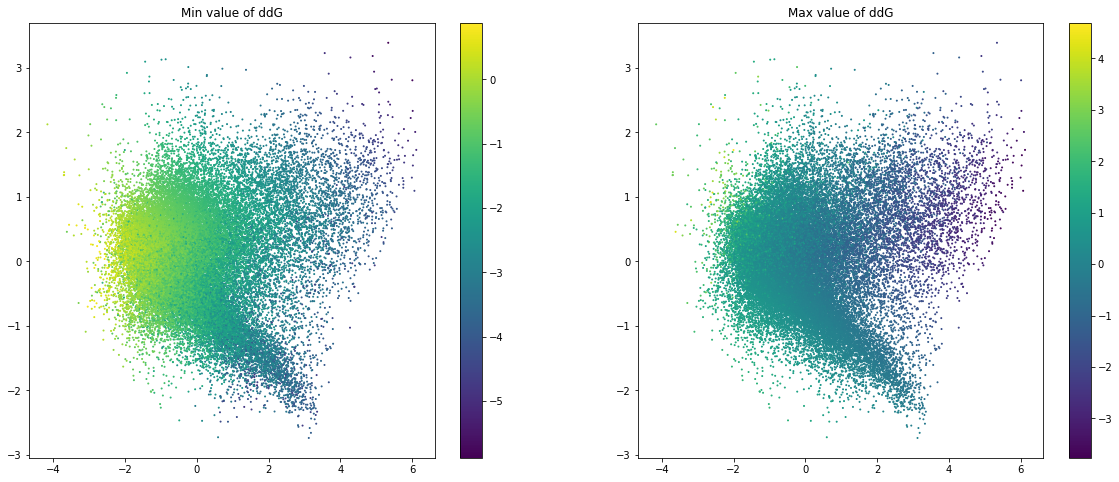

In [498]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title("Min value of ddG")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.min(axis=1))
plt.colorbar()

plt.subplot(122)
plt.title("Max value of ddG")
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.max(axis=1))
plt.colorbar()

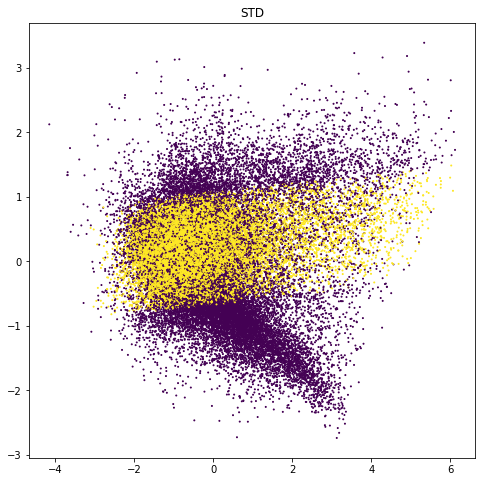

In [499]:
plt.figure(figsize=(8, 8))
plt.title("STD")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1) < 0.5)

#plt.colorbar()

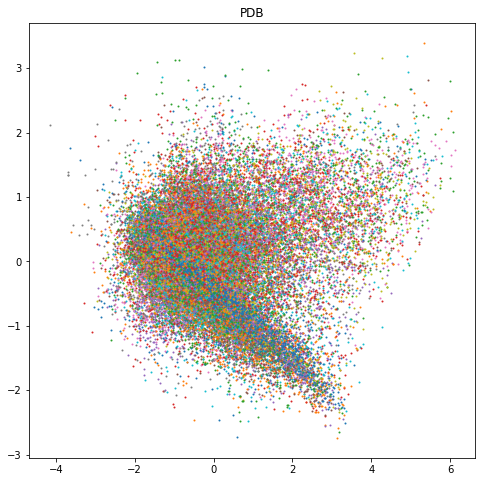

In [500]:
plt.figure(figsize=(8, 8))
plt.title("PDB")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
for i in result["m_PDB"].unique():
    plt.scatter(ans[result["m_PDB"] == i, 0], ans[result["m_PDB"] == i, 1], s=1, label=i)


In [501]:
result.

SyntaxError: invalid syntax (<ipython-input-501-47c30cf7607e>, line 1)

## Feature Distribution

In [ ]:
import seaborn as sb
#plt.hist(result["S_WT_DEPTH..angstrom."], bins=100)
plt.title("Depth KDE plot")
sb.kdeplot(result["S_WT_DEPTH..angstrom."], label="wild type")
sb.kdeplot(result["S_MT_DEPTH..angstrom."], label="mutated")


In [ ]:
len(result["S_PDB"].unique())

In [ ]:
114*20*20

## Check program outliers

In [ ]:
corr = np.corrcoef(ddg.T)
plt.title("DDG correlations")
plt.imshow(corr, vmin=0, vmax=1)
plt.xticks(range(len(prog)), prog)
plt.yticks(range(len(prog)), prog)
for i in range(len(prog)):
    for j in range(len(prog)):
        plt.text(i, j, np.round(corr[i, j], 2), {"ha":"center", "va":"center"})
plt.colorbar()

In [ ]:
corr

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1,
    cmap="YlGnBu",
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(prog_tmp)
ax.set_yticklabels(prog_tmp)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);


## BEST R2 to mean value

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
ddg["

## Classfication 0 - 0.5 - 2 - oo

## One Class SVM

In [82]:
from sklearn.svm import OneClassSVM

In [83]:
#outliers
out = Pipeline([("ss", SS()), 
                ("one_class_svm", OneClassSVM())
               ])

outliers = out.fit_predict(ddg)

In [84]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([21658, 21660]))

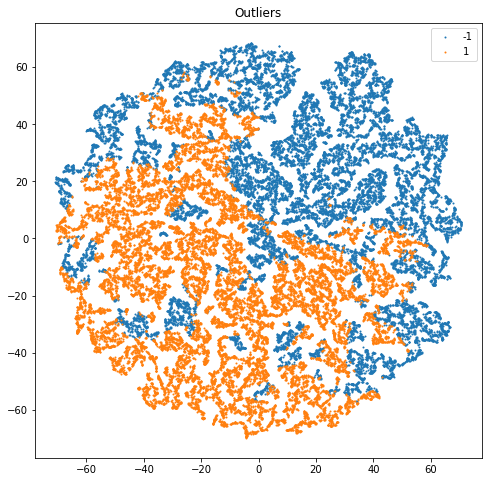

In [85]:
plt.figure(figsize=(8, 8))
plt.title("Outliers")
for i in [-1, 1]:
    tmp = ans[outliers == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=str(i))
plt.legend()

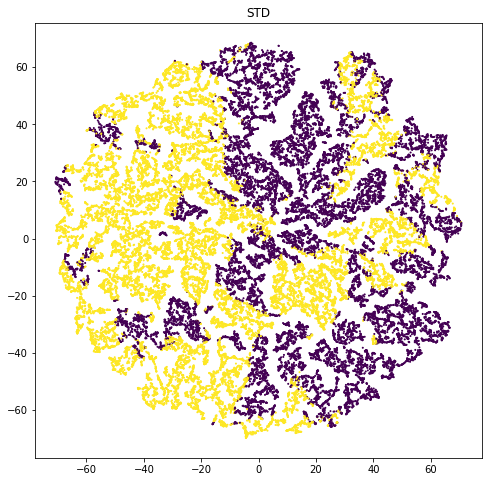

In [86]:
plt.figure(figsize=(8, 8))
plt.title("STD")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1) < 0.5)


## Clustering

### DBSCAN 

In [139]:
from sklearn.cluster import DBSCAN

In [178]:
cluster = Pipeline([("ss", SS()), 
                    ("clus", DBSCAN(metric="manhattan"))
                   ])

In [202]:
eps = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7]
cls = []


for i in eps:
        cls.append(Pipeline([("ss", SS()), 
                    ("clus", DBSCAN(min_samples=40, eps=i, metric="manhattan"))
                   ]))
        
    
for i in cls:
    i.fit(ddg)

In [203]:
for i in cls:
    print(len(np.unique(i.steps[1][1].labels_)))

1
1
1
5
3
2
2


In [204]:
np.unique(cls[3].steps[1][1].labels_, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([40301,  2903,    53,    31,    30]))

In [187]:
lbs = cls.steps[1][1].labels_
lbs.u

In [189]:
np.unique(lbs, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 array([ 6648, 36067,     5,     6,     6,     7,     8,    36,     7,
            8,     8,     5,     5,     7,     5,     5,     5,     9,
            9,     5,     3,    10,    10,     8,     8,     6,     9,
           13,    12,     6,     5,     6,     7,     5,     6,     5,
           11,     4,     5,     5,     4,     3,     4,     5,     4,
            5,     4,     5,     7,     3,     6,    12,   

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
n_clust = 18

In [ ]:
cluster = Pipeline([("ss", SS()), 
                    ("clus", KMeans(n_clusters=n_clust))
                   ])

In [ ]:
cluster.fit(ddg)

In [ ]:
np.unique(cluster.steps[1][1].labels_, return_counts=True)

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Clusters")
for i in range(n_clust):
    tmp = ans[cluster.steps[1][1].labels_ == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=str(i))
plt.legend()

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("STD")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1) < 0.5)

In [293]:
#TODO radar plots

In [294]:
result.sample()

,S_PDB,S_Chain.ID,S_POS,S_WT,S_MUT,S_WT_SSE,S_WT_RSA...,S_WT_DEPTH..angstrom.,S_WT_OSP,S_WT_SS,...,M_chain,M_WT,M_POS,M_MUT,M_PRED_DDG,m_PDB,m_WT,m_POS,m_MUT,m_PRED_DDG
key,,,,,,,,,,,,,,,,,,,,,
1WY6_K_16_R,1WY6,A,16,K,R,H,20.799999,4.04,0.45,1,...,A,K,16,R,-0.003875,1WY6,K,16.0,R,-1.228


In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Depth")
plt.boxplot([result[cluster.steps[1][1].labels_ == i]["S_WT_DEPTH..angstrom."] for i in range(n_clust)])
plt.show()

In [ ]:
ddg.head()

In [ ]:
plt.figure(figsize=(16, 16))
    
for num, p in enumerate(prog):
    plt.subplot(221 + num)
    plt.title(f"{p}")
    plt.boxplot([ddg[cluster.steps[1][1].labels_ == x][f"{p[0]}_PRED_DDG"] for x in range(n_clust)])
    plt.grid()

In [ ]:
plt.figure(figsize=(7, 4))
L = cluster.steps[1][1].labels_
plt.title("Cluster Populations")
plt.xlabel("Cluster")
plt.ylabel("Population")
plt.bar(range(n_clust), np.unique(L, return_counts=True)[1])

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("STD")
plt.boxplot([ddg[L == i].values.std(axis=1) for i in range(n_clust)])
plt.xlabel("Cluster")
plt.ylabel("STD")
plt.show()

In [ ]:
plt.figure(figsize=(7, 4))
plt.title("STD")
plt.ylabel("STD")
plt.xlabel("Cluster")
plt.bar(range(n_clust), [ddg[L == i].values.std(axis=1).mean() for i in range(n_clust)])

In [ ]:
result.S_WT_SSE.unique()

In [ ]:
sse = list(result.S_WT_SSE.unique())
cls = range(n_clust)

sse_table = np.zeros((len(sse), len(cls)))

for i, s in enumerate(sse):
    for j in cls:
        sse_table[i, j] = len(result[(L == j) & (result["S_WT_SSE"] == s)])
    
sse_table /= sse_table.sum(axis=0)
      
    
plt.figure(figsize=(8, 8))
plt.title("SSE distribution in Clusters")    
plt.imshow(sse_table, vmin=0, vmax=0.5)
plt.colorbar()
plt.yticks(range(9), sse)
plt.xticks(range(n_clust))
plt.show()

In [ ]:
wt = list(result.S_WT.unique())
mt = list(result.S_MUT.unique())

cls = range(n_clust)

wt_table = np.zeros((len(wt), len(cls)))
mt_table = np.zeros((len(mt), len(cls)))


for i, s in enumerate(wt):
    for j in cls:
        wt_table[i, j] = len(result[(L == j) & (result["S_WT"] == s)])
        mt_table[i, j] = len(result[(L == j) & (result["S_MUT"] == s)])
    
wt_table /= wt_table.sum(axis=0)
mt_table /= mt_table.sum(axis=0)

      
    
plt.figure(figsize=(8, 14))

plt.subplot(221)
plt.title("WT distribution in Clusters")    
plt.imshow(wt_table, vmin=0, vmax=0.1)
plt.yticks(range(20), wt)
plt.xticks(range(n_clust))
plt.colorbar()


plt.subplot(222)
plt.title("MT distribution in Clusters")    
plt.imshow(mt_table, vmin=0, vmax=0.1)
plt.yticks(range(20), wt) #yes it is
plt.xticks(range(n_clust))
plt.colorbar()

plt.show()

In [ ]:
sss = np.zeros((6, len(cls)))

for num, i in enumerate(["SN", "SO", "SS"]):
    for j in range(n_clust):
        sss[2*num, j]     = len(result[(result[f"S_WT_{i}"] == 0) & (L == j)])
        sss[2*num + 1, j] = len(result[(result[f"S_WT_{i}"] == 1) & (L == j)])
        
        s = sum(L == j)
        
        sss[2*num, j]     /= s
        sss[2*num + 1, j] /= s

plt.title("SN + SO + SS")
plt.xticks(range(6), ["SN_0", "SN_1", "SO_0", "SO_1", "SS_0", "SS_1"], rotation="vertical")
plt.imshow(sss.T)
plt.ylabel("cluster")
plt.xlabel("SSE + value")
plt.colorbar()